These codes plot the results for the paper.

We start with the figures involving feature selection.

In [2]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import scipy as sp

In [9]:
## Load the .pkl files with the various tasks. task+'under' has results where the PNN is forced to be in the underparameterised state by changing the theta values for the correlation

objects = []
import pickle
for task in ['MG_predict','NARMA','NARMA_pred','MG_predictunder','NARMAunder','NARMA_predunder']:
    with (open(str(task)+'.pkl', "rb")) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
names = objects[0].keys()
print(names)

dict_keys(['P1', 'P2', 'P3', 'Pall', 'All', 'JustMS', 'JustPW', 'JustWM', 'S1', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S2', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S3', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S4', 'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S5', 'S7', 'S8', 'S9', 'MS', 'PW', 'WM'])


C:\Users\kilia\AppData\Local\Temp\ipykernel_24608\1644905846.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax[t].scatter(x[j:j+2],results_Gen[0][2][j:j+2],c=colors[j],s=13)


(99, 3, 20)
(99, 3, 20)
[0.02614955 0.03401602 0.04122123 0.04458301 0.04369779 0.040603
 0.03774896 0.03610931 0.03500209 0.03454104 0.03436577 0.03627591
 0.04092661 0.0486031  0.05809699]
(99, 3, 20)


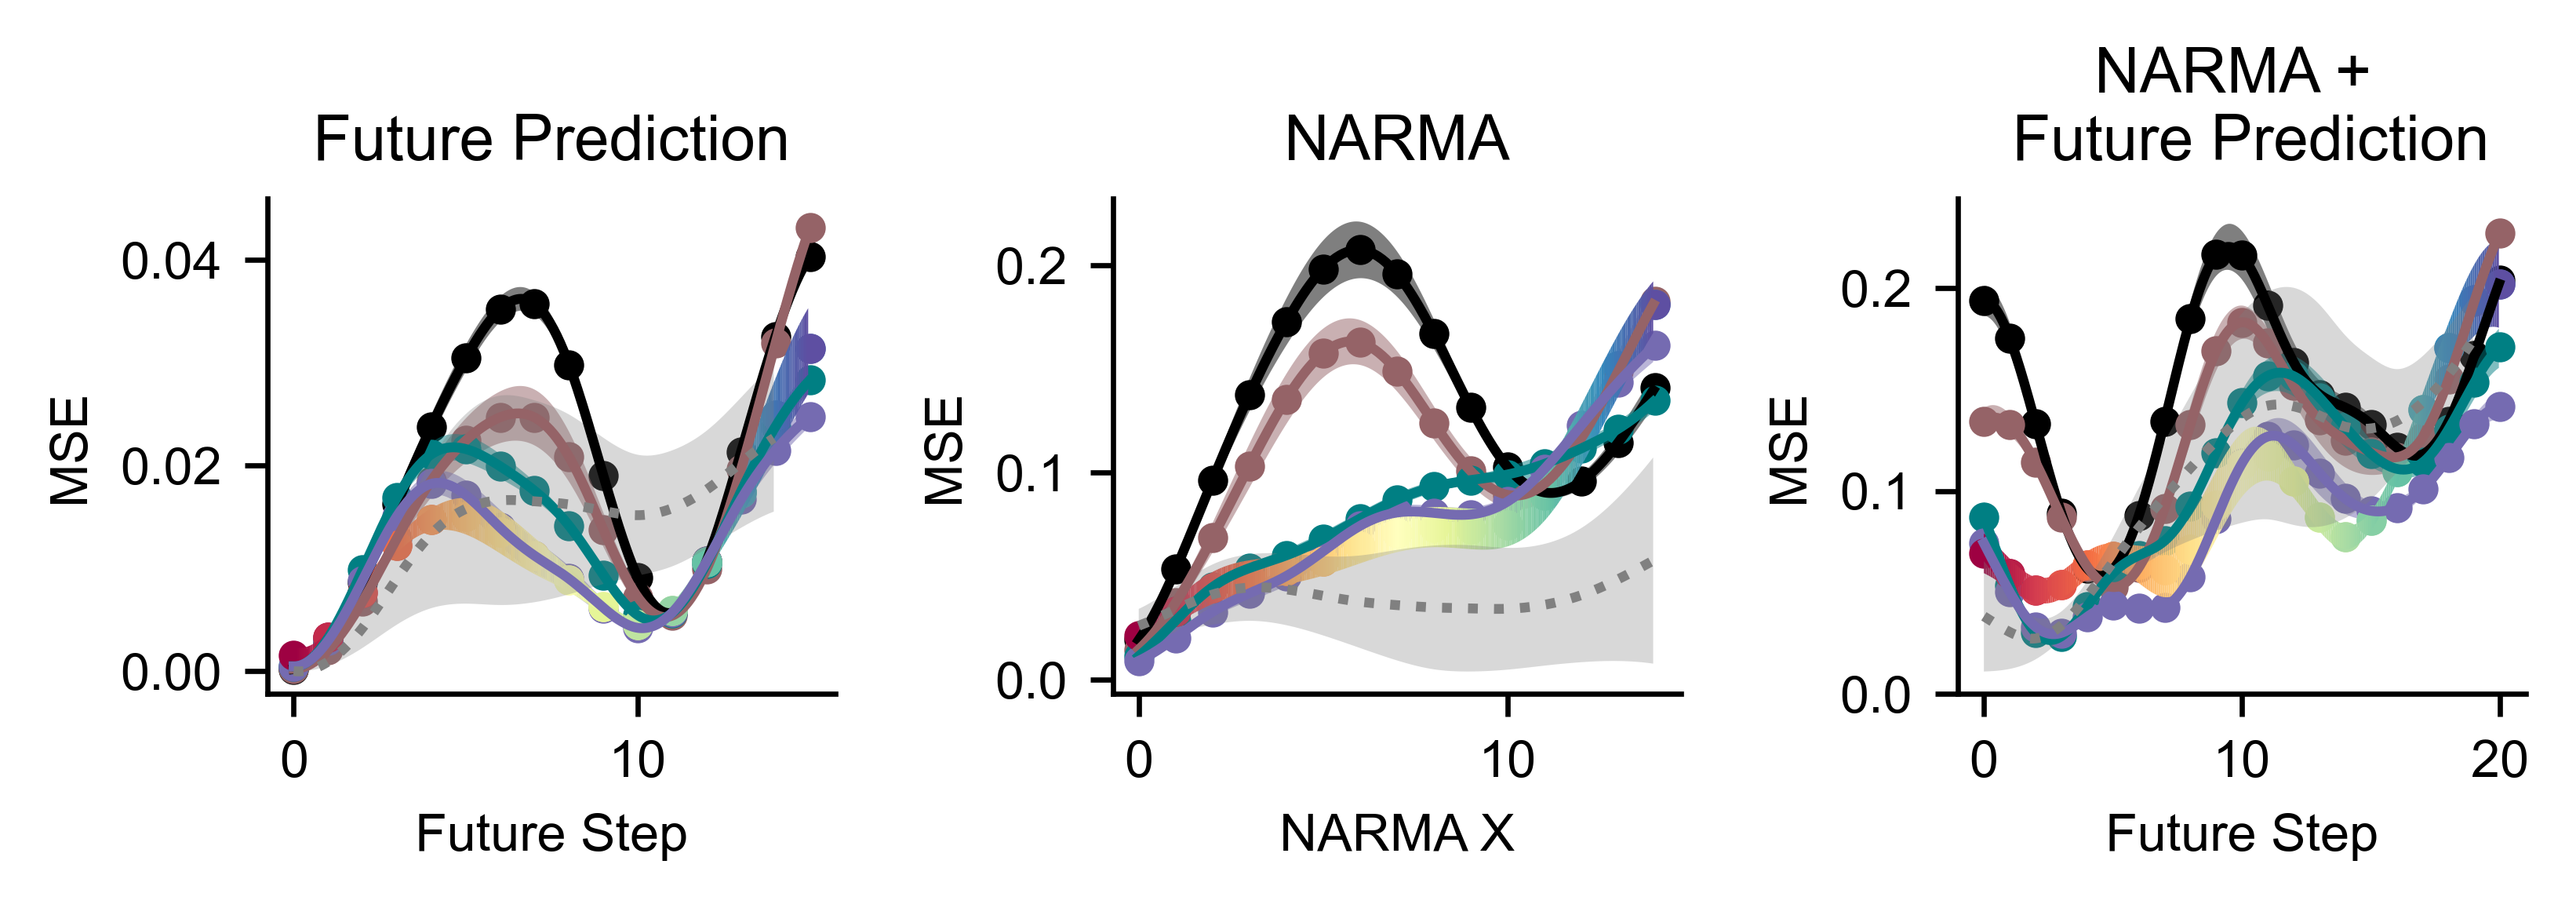

In [13]:
## Network plots for each task. 

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"]=8
plt.rcParams['figure.dpi'] = 600
cm=1/2.54
import scipy as sp
from scipy.interpolate import interp1d

c_list = ['k','#956367','#007f83','#756bb1','#e75347','r']

# Networks to plot
refs = ['WM','Pall','S34','S45','All']
# Add the 100 node ESN results
ESN=True
# Make the PNN underparameterised
PNN_under=False

fig,ax=plt.subplots(1,3,figsize = (14*cm,5*cm))

for t in range(3):
    
    for i in range(len(refs)):
        if refs[i]=='All':
            if PNN_under:
                results_Gen = objects[t+3][refs[i]][0]
            else:
                results_Gen = objects[t][refs[i]][0]
            
            x = np.arange(0,16)
            x = np.arange(0,len(results_Gen[0][2]))
            
            xx=np.arange(0,max(x),0.05)#:max(x)
            yy_up=sp.interpolate.interp1d(x, results_Gen[0][2]-2*results_Gen[0][3], kind='cubic')(xx)
            yy_down=sp.interpolate.interp1d(x, results_Gen[0][2]+2*results_Gen[0][3], kind='cubic')(xx)
            yy = sp.interpolate.interp1d(x, results_Gen[0][2], kind='cubic')(xx)

            yspace = np.linspace(0,len(results_Gen[0][2]),len(results_Gen[0][2]))
            colormap = plt.cm.Spectral #nipy_spectral, Set1,Paired   
            colors = [colormap(i) for i in np.linspace(0, 1,len(results_Gen[0][2]))]
            
            for j in range(len(results_Gen[0][2])):
                ax[t].scatter(x[j:j+2],results_Gen[0][2][j:j+2],c=colors[j],s=13)
                
            colors = [colormap(i) for i in np.linspace(0, 1,len(xx))]
            
            for j in range(len(xx)): 
                
                ax[t].fill_between(xx[j:j+2],yy_down[j:j+2],yy_up[j:j+2],alpha=1,facecolor=colors[j])
                
        else:
            results_Gen = objects[t][refs[i]][0]
            
            x = np.arange(0,len(results_Gen[0][3]))
            if t==1:
                x=np.arange(0,15)
            
            xx=np.arange(0,max(x),0.05)#:max(x)
            yy_up=sp.interpolate.interp1d(x, results_Gen[0][2]-2*results_Gen[0][3], kind='cubic')(xx)
            yy_down=sp.interpolate.interp1d(x, results_Gen[0][2]+2*results_Gen[0][3], kind='cubic')(xx)
            yy = sp.interpolate.interp1d(x, results_Gen[0][2], kind='cubic')(xx)
            #print(results_Gen[0])
            ax[t].fill_between(xx,yy_down,yy_up,alpha=0.5,facecolor=c_list[i])
            ax[t].scatter(x[:len(results_Gen[0][2])],results_Gen[0][2],label = refs[i],c=c_list[i],s=13)
            
            ax[t].plot(xx[:len(yy)],yy,label = refs[i],c=c_list[i])
for t in range(3):
    ax[t].spines['top'].set_visible(False)
    ax[t].spines['right'].set_visible(False)
    ax[t].set_ylabel('MSE')
ax[0].set_xlabel('Future Step')
ax[1].set_xlabel('NARMA X')
ax[2].set_xlabel('Future Step')
ax[0].set_title('Future Prediction')
ax[1].set_title('NARMA')
ax[2].set_title('NARMA + \n Future Prediction')

if ESN:
    f1 = r"Benchmarks\ESN_broad_plots\All_data_T_data_300.npy"
    d1=np.load(f1)
    esncol='grey'
    t=0
    print(d1.shape)
    means = d1[:,0,:15]
    stds = d1[:,1,:15]
    i=20
    x = np.arange(0,len(means[i]))

    xx=np.arange(0,max(x),0.05)#:max(x)
    yy_up=sp.interpolate.interp1d(x, means[i]-2*stds[i], kind='cubic')(xx)
    yy_down=sp.interpolate.interp1d(x, means[i]+2*stds[i], kind='cubic')(xx)
    yy = sp.interpolate.interp1d(x, means[i], kind='cubic')(xx)
    #print(results_Gen[0])
    ax[0].fill_between(xx,yy_down,yy_up,alpha=0.3,facecolor=esncol)
    ##ax[0].scatter(x[:len( means[i])], means[i],label = refs[i],c=c_list[i],s=13)

    ax[0].plot(xx[:len(yy)],yy,c=esncol,ls=':')

    f1 = r"Benchmarks\ESN_broad_NARMA_plots\All_data_T_data_300.npy"
    d1=np.load(f1)
    print(d1.shape)
    means = d1[:,0,:15]
    stds = d1[:,1,:15]
    #i=-1
    x = np.arange(0,len(means[i]))

    xx=np.arange(0,max(x),0.05)#:max(x)
    yy_up=sp.interpolate.interp1d(x, means[i]-2*stds[i], kind='cubic')(xx)
    yy_down=sp.interpolate.interp1d(x, means[i]+2*stds[i], kind='cubic')(xx)
    yy = sp.interpolate.interp1d(x, means[i], kind='cubic')(xx)
    print(means[i])
    #print(results_Gen[0])
    ax[1].fill_between(xx,yy_down,yy_up,alpha=0.3,facecolor=esncol)
    #ax[1].scatter(x[:len( means[i])], means[i],c=esncol,s=5)
    #print(yy)
    ax[1].plot(xx[:len(yy)],yy,c=esncol,ls=':')

    f1 = r"Benchmarks\ESN_broad_NARMA_pred_plots\All_data_T_data_300.npy"
    d1=np.load(f1)

    t=1
    print(d1.shape)
    means = d1[:,0,:]
    stds = d1[:,1,:]
    #i=-1
    x = np.arange(0,len(means[i]))

    xx=np.arange(0,max(x),0.05)#:max(x)

    yy_up=sp.interpolate.interp1d(x, means[i]-2*stds[i], kind='cubic')(xx)
    yy_down=sp.interpolate.interp1d(x, means[i]+2*stds[i], kind='cubic')(xx)
    yy = sp.interpolate.interp1d(x, means[i], kind='cubic')(xx)
    #print(results_Gen[0])
    ax[2].fill_between(xx,yy_down,yy_up,alpha=0.3,facecolor=esncol)
    #ax[2].scatter(x[:len( means[i])], means[i],label = refs[i],c=c_list[i],s=13)

    ax[2].plot(xx[:len(yy)],yy,c=esncol,ls=':')
plt.tight_layout()


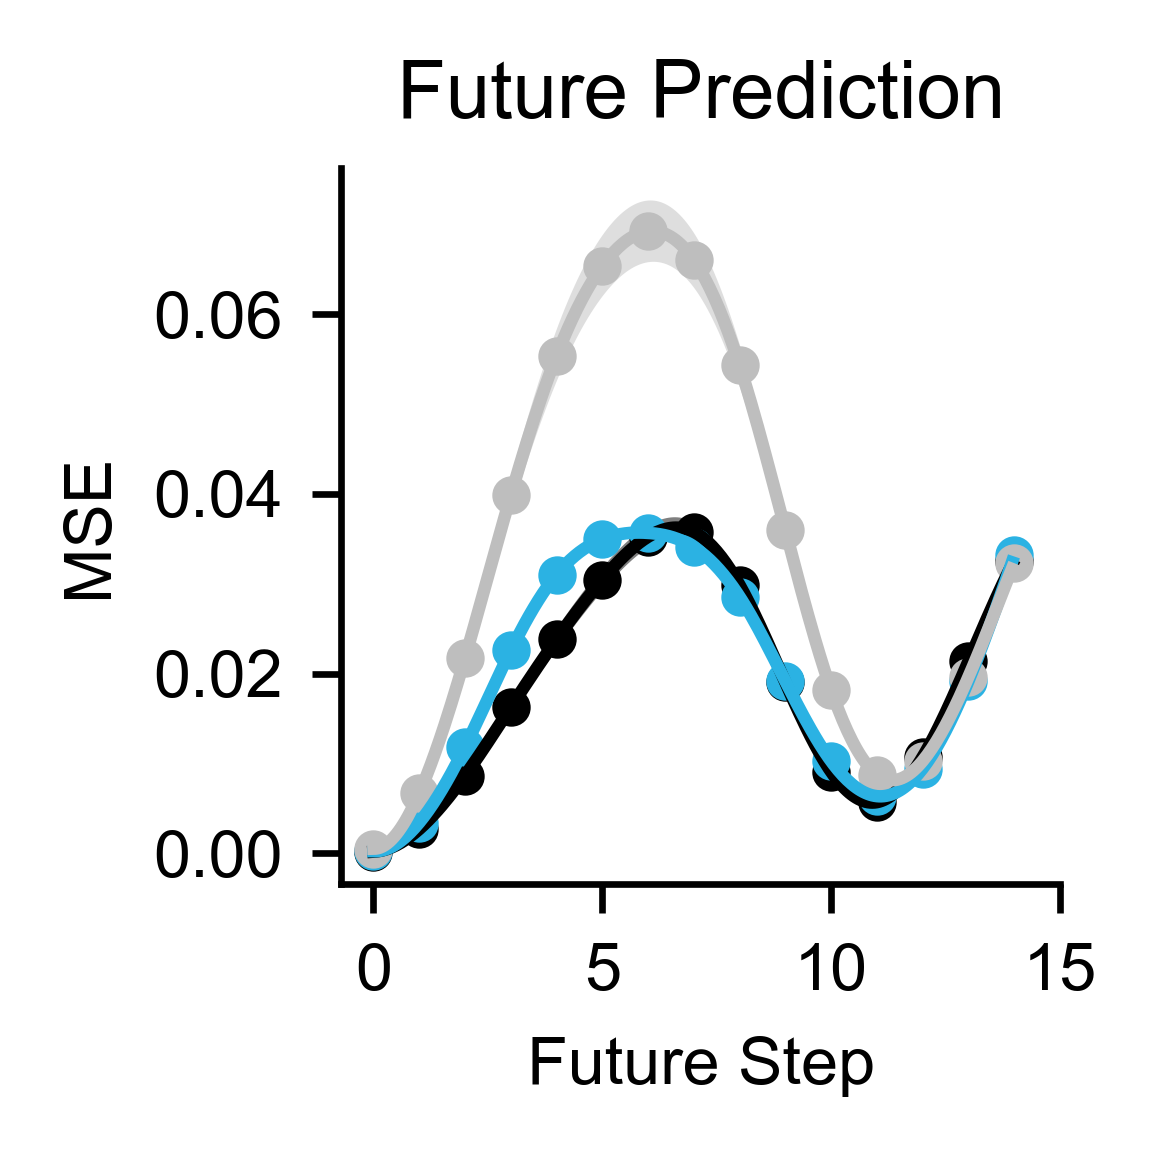

In [15]:
## Single arrays 

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"]=8
plt.rcParams['figure.dpi'] = 600
cm=1/2.54
import scipy as sp
from scipy.interpolate import interp1d
c_list = ['k','#2BB2E3','#BEBEBE']

refs = ['WM','PW','MS']

fig,ax=plt.subplots(1,1,figsize = (5*cm,5*cm))

for t in range(1):
    
    for i in range(len(refs)):
        
        
        results_Gen = objects[t][refs[i]][0]
        
        x = np.arange(0,len(results_Gen[0][3]))
        
        if t==0:
            x=np.arange(0,15)
        if t==1:
            x=np.arange(0,15)
        if t==2:
            x=np.arange(0,19)
        xx=np.arange(0,max(x),0.05)#:max(x)
        yy_up=sp.interpolate.interp1d(x, results_Gen[0][2][:len(x)]-2*results_Gen[0][3][:len(x)], kind='cubic')(xx)
        yy_down=sp.interpolate.interp1d(x, results_Gen[0][2][:len(x)]+2*results_Gen[0][3][:len(x)], kind='cubic')(xx)
        yy = sp.interpolate.interp1d(x, results_Gen[0][2][:len(x)], kind='cubic')(xx)
        
        ax.fill_between(xx,yy_down,yy_up,alpha=0.5,facecolor=c_list[i])
        ax.scatter(x,results_Gen[0][2][:len(x)],label = refs[i],c=c_list[i],s=13)
        
        ax.plot(xx[:len(yy)],yy,label = refs[i],c=c_list[i])
for t in range(1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('MSE')
ax.set_xlabel('Future Step')

ax.set_title('Future Prediction')

ax.set_xticks([0,5,10,15])


plt.tight_layout()
